In [171]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import pylab
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline
import os

In [3]:
wholesale_df = pd.read_csv('Wholesale Customer.csv')

In [4]:
wholesale_df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [5]:
wholesale_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [6]:
print('Detailed Statastics of data including Channel & Retail:')
wholesale_df.describe(include='all')

Detailed Statastics of data including Channel & Retail:


,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440,440,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
unique,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Hotel,Other,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,298,316,NaN,NaN,NaN,NaN,NaN,NaN
mean,220.500000,NaN,NaN,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,NaN,NaN,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,NaN,NaN,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,NaN,NaN,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,NaN,NaN,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,NaN,NaN,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000


In [60]:
wholesale_df.isnull().values.any()

False

In [7]:
wholesale_df['Spending'] =wholesale_df['Fresh']+wholesale_df['Milk']+wholesale_df['Grocery']+wholesale_df['Frozen']+wholesale_df['Detergents_Paper']+wholesale_df['Delicatessen']
wholesale_df

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Spending
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100
...,...,...,...,...,...,...,...,...,...,...
435,436,Hotel,Other,29703,12051,16027,13135,182,2204,73302
436,437,Hotel,Other,39228,1431,764,4510,93,2346,48372
437,438,Retail,Other,14531,15488,30243,437,14841,1867,77407
438,439,Hotel,Other,10290,1981,2232,1038,168,2125,17834


In [8]:
region_df = wholesale_df.groupby('Region')['Spending'].sum()
print(region_df,'\n')
channel_df = wholesale_df.groupby('Channel')['Spending'].sum()
print(channel_df)

Region
Lisbon     2386813
Oporto     1555088
Other     10677599
Name: Spending, dtype: int64 

Channel
Hotel     7999569
Retail    6619931
Name: Spending, dtype: int64


#### Highest spendings in the Region is from Others and lowest spendings in the region is from Oporto
#### Highest spendings in the Channel is from Hotel and lowest spendings in the Channel is from Retail.

In [9]:
region_channel_df = wholesale_df.groupby(['Region','Channel'])['Spending'].sum()
print(region_channel_df)

Region  Channel
Lisbon  Hotel      1538342
        Retail      848471
Oporto  Hotel       719150
        Retail      835938
Other   Hotel      5742077
        Retail     4935522
Name: Spending, dtype: int64


##### Highest spendings in the Region/Channel is from Others/Hotel
##### Lowest spendings in the Region/Channel is from Oporto/Hotel

In [10]:
new_df= wholesale_df.fillna("Not Disclosed") 
mean = new_df.groupby('Channel').mean()
mean.round(2)

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Spending
Channel,,,,,,,,
Hotel,238.37,13475.56,3451.72,3962.14,3748.25,790.56,1415.96,26844.19
Retail,183.00,8904.32,10716.50,16322.85,1652.61,7269.51,1753.44,46619.23


#### In Channel "Hotel" Average Highest Spending in Fresh items and Lowest Spending in Detergents_Paper.
#### In Channel "Retail" Average Highest Spending in Grocery items and Lowest Spending in Frozen items.

In [11]:
new = wholesale_df.fillna("Not Disclosed")
mean2 = new.groupby('Region').mean()
mean2.round(2)

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Spending
Region,,,,,,,,
Lisbon,235.00,11101.73,5486.42,7403.08,3000.34,2651.12,1354.9,30997.57
Oporto,317.00,9887.68,5088.17,9218.60,4045.36,3687.47,1159.7,33086.98
Other,202.61,12533.47,5977.09,7896.36,2944.59,2817.75,1620.6,33789.87


#### In Region "Lisbon" Average Highest Spending in Fresh and Lowest in Delicatessen items.
#### In Region "Oporto" Average Highest Spending in Fresh and Lowest in Delicatessen items.
#### In Region "Other" Average Highest Spending in Fresh and Lowest in Delicatessen items.

Text(0.5, 1.0, 'Item - Delicatessen')

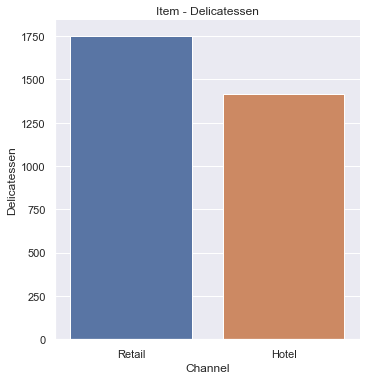

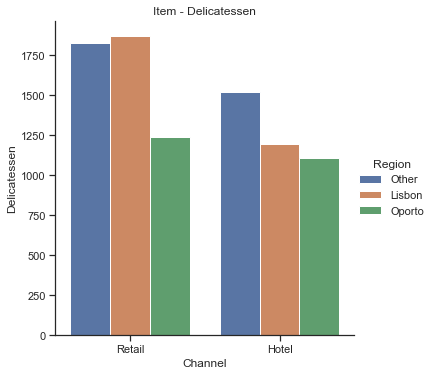

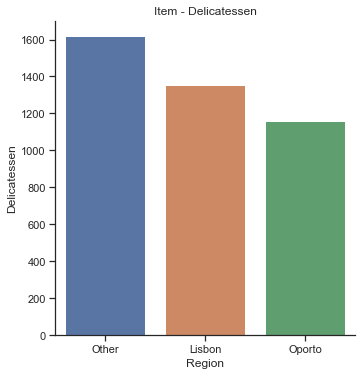

In [12]:
sns.catplot(x='Channel', y='Delicatessen', kind='bar', ci=None, data=wholesale_df)
plt.title('Item - Delicatessen')

sns.set(style='ticks', color_codes=True)
sns.catplot(x='Channel', y='Delicatessen', hue ='Region', kind='bar', ci=None, data=wholesale_df)
plt.title('Item - Delicatessen')

sns.catplot(x='Region', y='Delicatessen', kind='bar', ci=None, data=wholesale_df)
plt.title('Item - Delicatessen')

Text(0.5, 1.0, 'Item - Fresh')

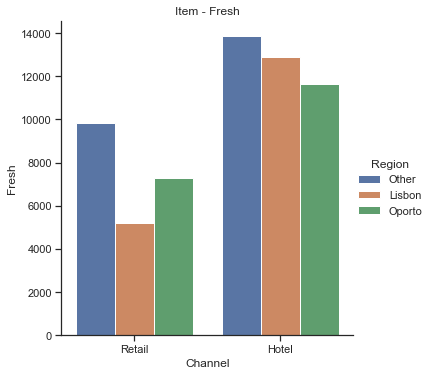

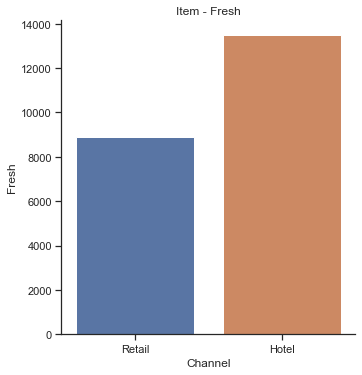

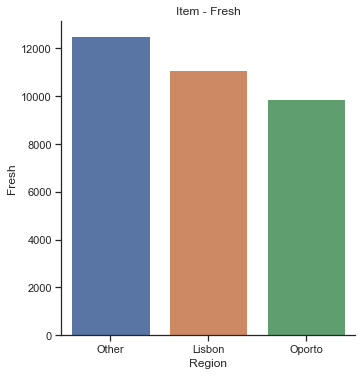

In [13]:
sns.set(style="ticks", color_codes=True)
sns.catplot(x="Channel", y="Fresh", hue ="Region", kind="bar", ci=None, data=wholesale_df)
plt.title('Item - Fresh')

sns.catplot(x="Channel", y="Fresh", kind="bar", ci=None, data=wholesale_df)
plt.title('Item - Fresh')

sns.catplot(x="Region", y="Fresh", kind="bar", ci=None, data=wholesale_df)
plt.title('Item - Fresh')

Text(0.5, 1.0, 'Item - Milk')

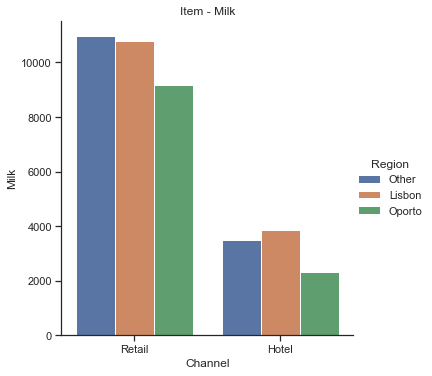

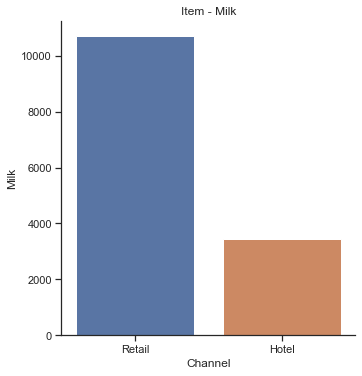

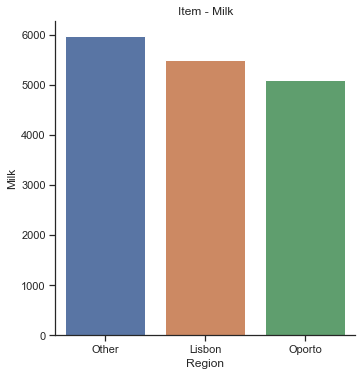

In [14]:
sns.set(style="ticks", color_codes=True)
sns.catplot(x="Channel", y="Milk", hue ="Region", kind="bar", ci=None, data=wholesale_df)
plt.title('Item - Milk')

sns.catplot(x="Channel", y="Milk", kind="bar", ci=None, data=wholesale_df)
plt.title('Item - Milk')

sns.catplot(x="Region", y="Milk", kind="bar", ci=None, data=wholesale_df)
plt.title('Item - Milk')

Text(0.5, 1.0, 'Item - Grocery')

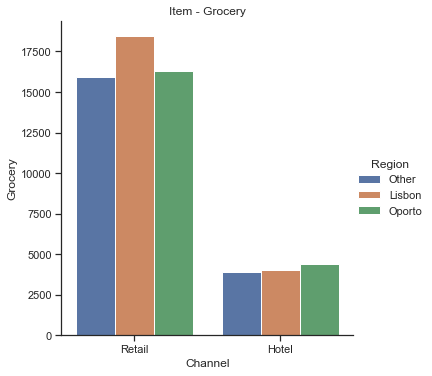

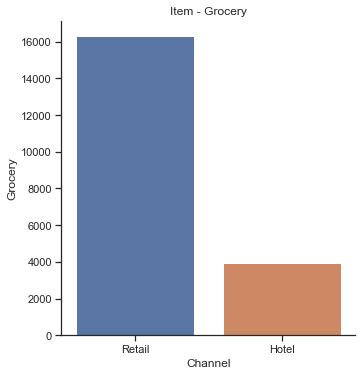

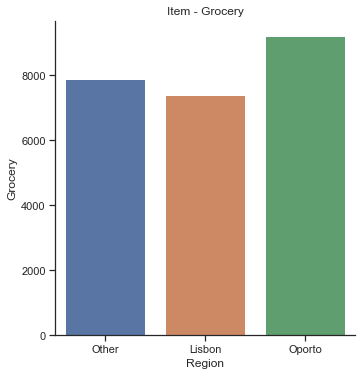

In [15]:
sns.set(style="ticks", color_codes=True)
sns.catplot(x="Channel", y="Grocery", hue ="Region", kind="bar", ci=None, data=wholesale_df)
plt.title('Item - Grocery')

sns.catplot(x="Channel", y="Grocery", kind="bar", ci=None, data=wholesale_df)
plt.title('Item - Grocery')

sns.catplot(x="Region", y="Grocery", kind="bar", ci=None, data=wholesale_df)
plt.title('Item - Grocery')

Text(0.5, 1.0, 'Item - Frozen')

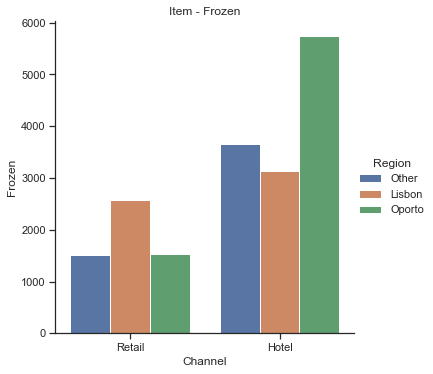

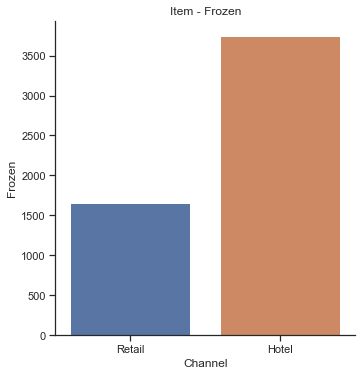

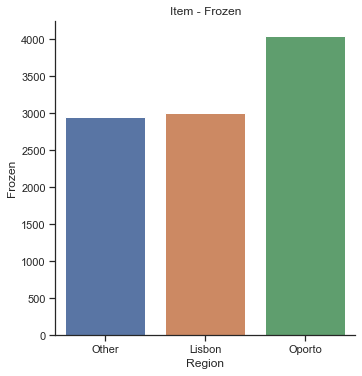

In [16]:
sns.set(style="ticks", color_codes=True)
sns.catplot(x="Channel", y="Frozen", hue ="Region", kind="bar", ci=None, data=wholesale_df)
plt.title('Item - Frozen')

sns.catplot(x="Channel", y="Frozen", kind="bar", ci=None, data=wholesale_df)
plt.title('Item - Frozen')

sns.catplot(x="Region", y="Frozen", kind="bar", ci=None, data=wholesale_df)
plt.title('Item - Frozen')

Text(0.5, 1.0, 'Item - Detergents_Paper')

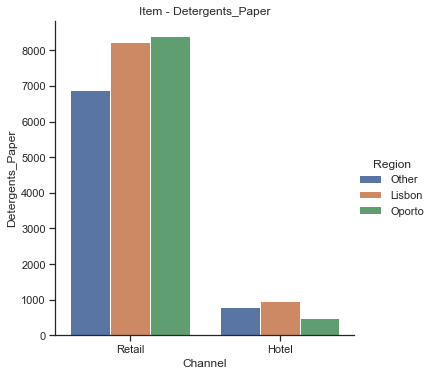

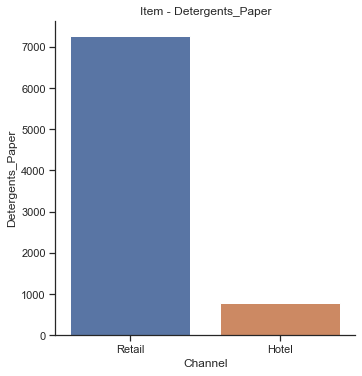

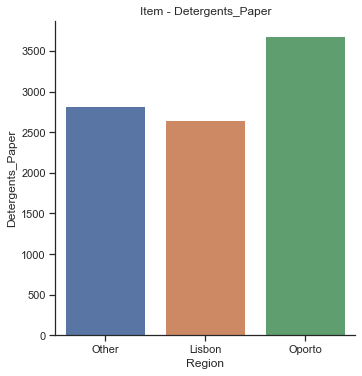

In [17]:
sns.set(style="ticks", color_codes=True)
sns.catplot(x="Channel", y="Detergents_Paper", hue ="Region", kind="bar", ci=None, data=wholesale_df)
plt.title('Item - Detergents_Paper')

sns.catplot(x="Channel", y="Detergents_Paper", kind="bar", ci=None, data=wholesale_df)
plt.title('Item - Detergents_Paper')

sns.catplot(x="Region", y="Detergents_Paper", kind="bar", ci=None, data=wholesale_df)
plt.title('Item - Detergents_Paper')

In [18]:
item = wholesale_df[wholesale_df.columns[+2:wholesale_df.columns.size]]
std_deviation = item.std() 
std_deviation.round(2)
#standard deviation to check the measure of variabilty

Fresh               12647.33
Milk                 7380.38
Grocery              9503.16
Frozen               4854.67
Detergents_Paper     4767.85
Delicatessen         2820.11
Spending            26356.30
dtype: float64

#### Fresh item have highest Standard deviation So that is Inconsistent.
#### Delicatessen item have smallest Standard deviation, So that is consistent.

In [21]:
products = wholesale_df[wholesale_df.columns[+2:wholesale_df.columns.size]]
cv_detergents_paper = np.std(products['Detergents_Paper']) / np.mean(products['Detergents_Paper'])
cv_detergents_paper

1.6527657881041729

In [22]:
cv_fresh = np.std(products['Fresh']) / np.mean(products['Fresh'])
cv_fresh

1.0527196084948245

In [23]:
cv_frozen = np.std(products['Frozen']) / np.mean(products['Frozen'])
cv_frozen

1.5785355298607762

In [24]:
cv_grocery = np.std(products['Grocery']) / np.mean(products['Grocery'])
cv_grocery

1.193815447749267

In [25]:
cv_milk = np.std(products['Milk']) / np.mean(products['Milk'])
cv_milk

1.2718508307424503

In [26]:
cv_delicatessen = np.std(products['Delicatessen']) / np.mean(products['Delicatessen'])
cv_delicatessen

1.8473041039189306

## Above values based on coeffiecent of Variation
#### Fresh item have lowest coefficient of Variation So that is consistent.

#### Delicatessen item have highest coefficient of Variation, So that is Inconsistent.

In [27]:
varianceItems = products.var()
varianceItems

Fresh               1.599549e+08
Milk                5.446997e+07
Grocery             9.031010e+07
Frozen              2.356785e+07
Detergents_Paper    2.273244e+07
Delicatessen        7.952997e+06
Spending            6.946546e+08
dtype: float64

In [28]:
products.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Spending
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455,33226.136364
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937,26356.301730
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,904.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000,17448.750000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000,27492.000000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000,41307.500000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000,199891.000000


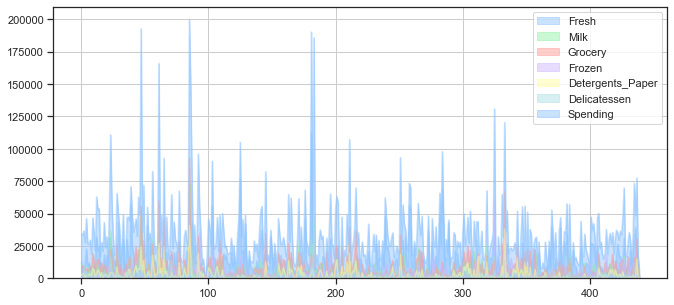

In [29]:
pylab.style.use('seaborn-pastel')
products.plot.area(stacked=False,figsize=(11,5))
pylab.grid(); pylab.show()

<AxesSubplot:>

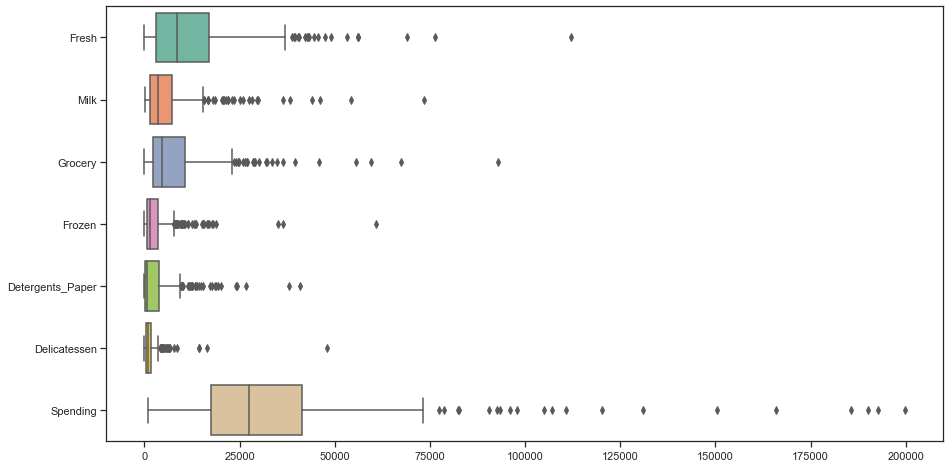

In [30]:
plt.figure(figsize=(15,8))
sns.boxplot(data=products, orient="h", palette="Set2")
#1.4

#### Yes there are outliers in all the items across the products(Fresh, Milk, Grocery, Frozen, Detergents_Paper & Delicatessen)
#### Outliers are detected but not necessarily removed, it depends of the situation. Here I will assume that the wholesale distributor provided us a dataset with correct data, so I will keep them as is.

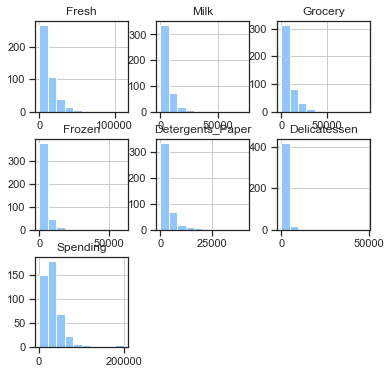

In [31]:
# visual analysis via histogram
products.hist(figsize=(6,6));

In [32]:
products.corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Spending
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690,0.575178
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368,0.776909
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497,0.740680
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947,0.388436
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291,0.633882
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000,0.496849
Spending,0.575178,0.776909,0.740680,0.388436,0.633882,0.496849,1.000000


Correlation Heat map of the data


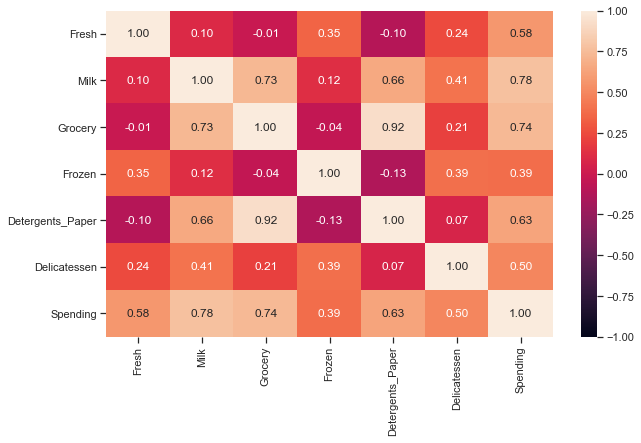

In [33]:
print('Correlation Heat map of the data')
plt.figure(figsize=(10,6))
sns.heatmap(products.corr(),annot=True,fmt='.2f',vmin=-1,vmax=1)
plt.show()

In [35]:
cmsu_df = pd.read_csv('Survey-1.csv')

In [36]:
cmsu_df.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [37]:
cmsu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


In [39]:
cmsu_df.describe(include = "all")

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
count,62.000000,62,62.000000,62,62,62,62.000000,62,62.000000,62.000000,62.000000,62.000000,62,62.000000
unique,NaN,2,NaN,3,8,3,NaN,3,NaN,NaN,NaN,NaN,3,NaN
top,NaN,Female,NaN,Senior,Retailing/Marketing,Yes,NaN,Part-Time,NaN,NaN,NaN,NaN,Laptop,NaN
freq,NaN,33,NaN,31,14,28,NaN,43,NaN,NaN,NaN,NaN,55,NaN
mean,31.500000,NaN,21.129032,NaN,NaN,NaN,3.129032,NaN,48.548387,1.516129,3.741935,482.016129,NaN,246.209677
std,18.041619,NaN,1.431311,NaN,NaN,NaN,0.377388,NaN,12.080912,0.844305,1.213793,221.953805,NaN,214.465950
min,1.000000,NaN,18.000000,NaN,NaN,NaN,2.300000,NaN,25.000000,0.000000,1.000000,100.000000,NaN,0.000000
25%,16.250000,NaN,20.000000,NaN,NaN,NaN,2.900000,NaN,40.000000,1.000000,3.000000,312.500000,NaN,100.000000
50%,31.500000,NaN,21.000000,NaN,NaN,NaN,3.150000,NaN,50.000000,1.000000,4.000000,500.000000,NaN,200.000000
75%,46.750000,NaN,22.000000,NaN,NaN,NaN,3.400000,NaN,55.000000,2.000000,4.000000,600.000000,NaN,300.000000


In [59]:
cmsu_df.isnull().values.any()

False

# 2.1

In [40]:
pd.crosstab(cmsu_df['Gender'], cmsu_df['Major'])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


<AxesSubplot:xlabel='Major', ylabel='count'>

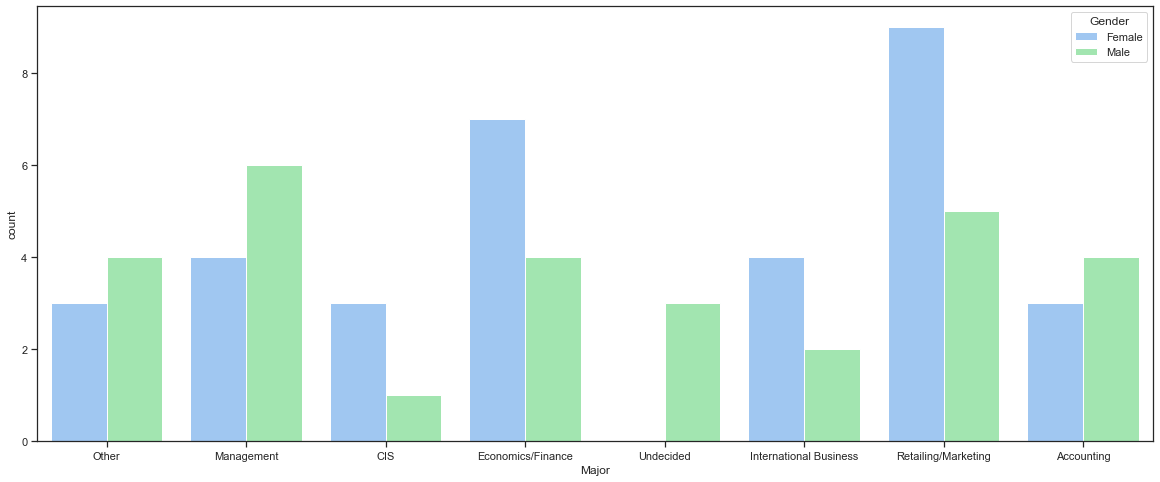

In [57]:
plt.figure(figsize=(20,8))
sns.countplot(x= 'Major', hue= 'Gender', data= cmsu_df)

In [41]:
pd.crosstab(cmsu_df['Gender'], cmsu_df['Grad Intention'])

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


<AxesSubplot:xlabel='Grad Intention', ylabel='count'>

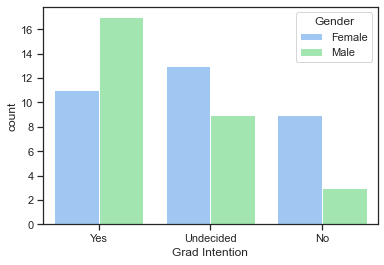

In [46]:
sns.countplot(x= 'Grad Intention', hue= 'Gender', data= cmsu_df)

In [42]:
pd.crosstab(cmsu_df['Gender'], cmsu_df['Employment'])

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


<AxesSubplot:xlabel='Employment', ylabel='count'>

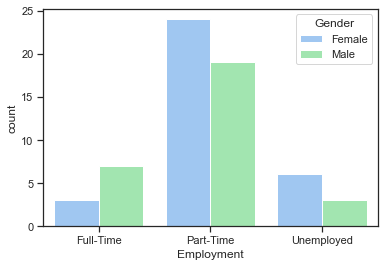

In [47]:
sns.countplot(x= 'Employment', hue= 'Gender', data= cmsu_df)

In [43]:
pd.crosstab(cmsu_df['Gender'], cmsu_df['Computer'])

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


<AxesSubplot:xlabel='Computer', ylabel='count'>

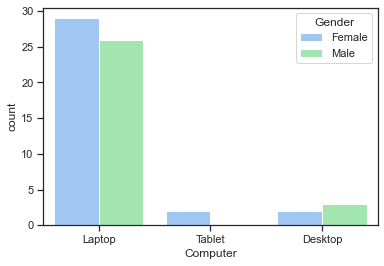

In [48]:
sns.countplot(x= 'Computer', hue= 'Gender', data= cmsu_df)

In [56]:
pd.pivot_table(cmsu_df, index=['Grad Intention', 'Computer', "Employment", "Major"],
                     columns=['Gender' ])

Age  \
Gender                                                        Female   
Grad Intention Computer Employment Major                               
No             Desktop  Part-Time  International Business  21.000000   
               Laptop   Full-Time  Undecided                     NaN   
                        Part-Time  CIS                     20.000000   
                                   Economics/Finance       23.000000   
                                   International Business  21.000000   
                                   Management                    NaN   
                                   Retailing/Marketing     20.666667   
               Tablet   Unemployed Management              21.000000   
Undecided      Desktop  Part-Time  International Business        NaN   
               Laptop   Part-Time  Accounting                    NaN   
                                   CIS                     19.000000   
                                   Economics/Finance       21.000000   
                                   International Business        NaN   
                                   Management              21.000000   
                                   Other                   21.000000   
                                   Retailing/Marketing     21.000000   
                                   Undecided                     NaN   
                        Unemployed Accounting                    NaN   
                                   Economics/Finance       22.000000   
                                   Management              20.000000   
                                   Other                         NaN   
                                   Retailing/Marketing     22.000000   
               Tablet   Full-Time  Other                   22.000000   
Yes            Desktop  Full-Time  Accounting                    NaN   
                        Part-Time  Accounting              26.000000   
                                   Other                         NaN   
               Laptop   Full-Time  CIS                           NaN   
                                   Economics/Finance       23.000000   
                                   Management                    NaN   
                                   Other                   20.000000   
                                   Retailing/Marketing           NaN   
                                   Undecided                     NaN   
                        Part-Time  Accounting              22.000000   
                                   Economics/Finance       20.500000   
                                   International Business  20.500000   
                                   Management                    NaN   
                                   Other                         NaN   
                                   Retailing/Marketing           NaN   
                        Unemployed Management              20.000000   
                                   Retailing/Marketing     20.000000   

                                                                      \
Gender                                                          Male   
Grad Intention Computer Employment Major                               
No             Desktop  Part-Time  International Business        NaN   
               Laptop   Full-Time  Undecided               21.000000   
                        Part-Time  CIS                           NaN   
                                   Economics/Finance             NaN   
                                   International Business        NaN   
                                   Management              21.000000   
                                   Retailing/Marketing     21.000000   
               Tablet   Unemployed Management                    NaN   
Undecided      Desktop  Part-Time  International Business  22.000000   
               Laptop   Part-Time  Accounting              20.000000   
                                

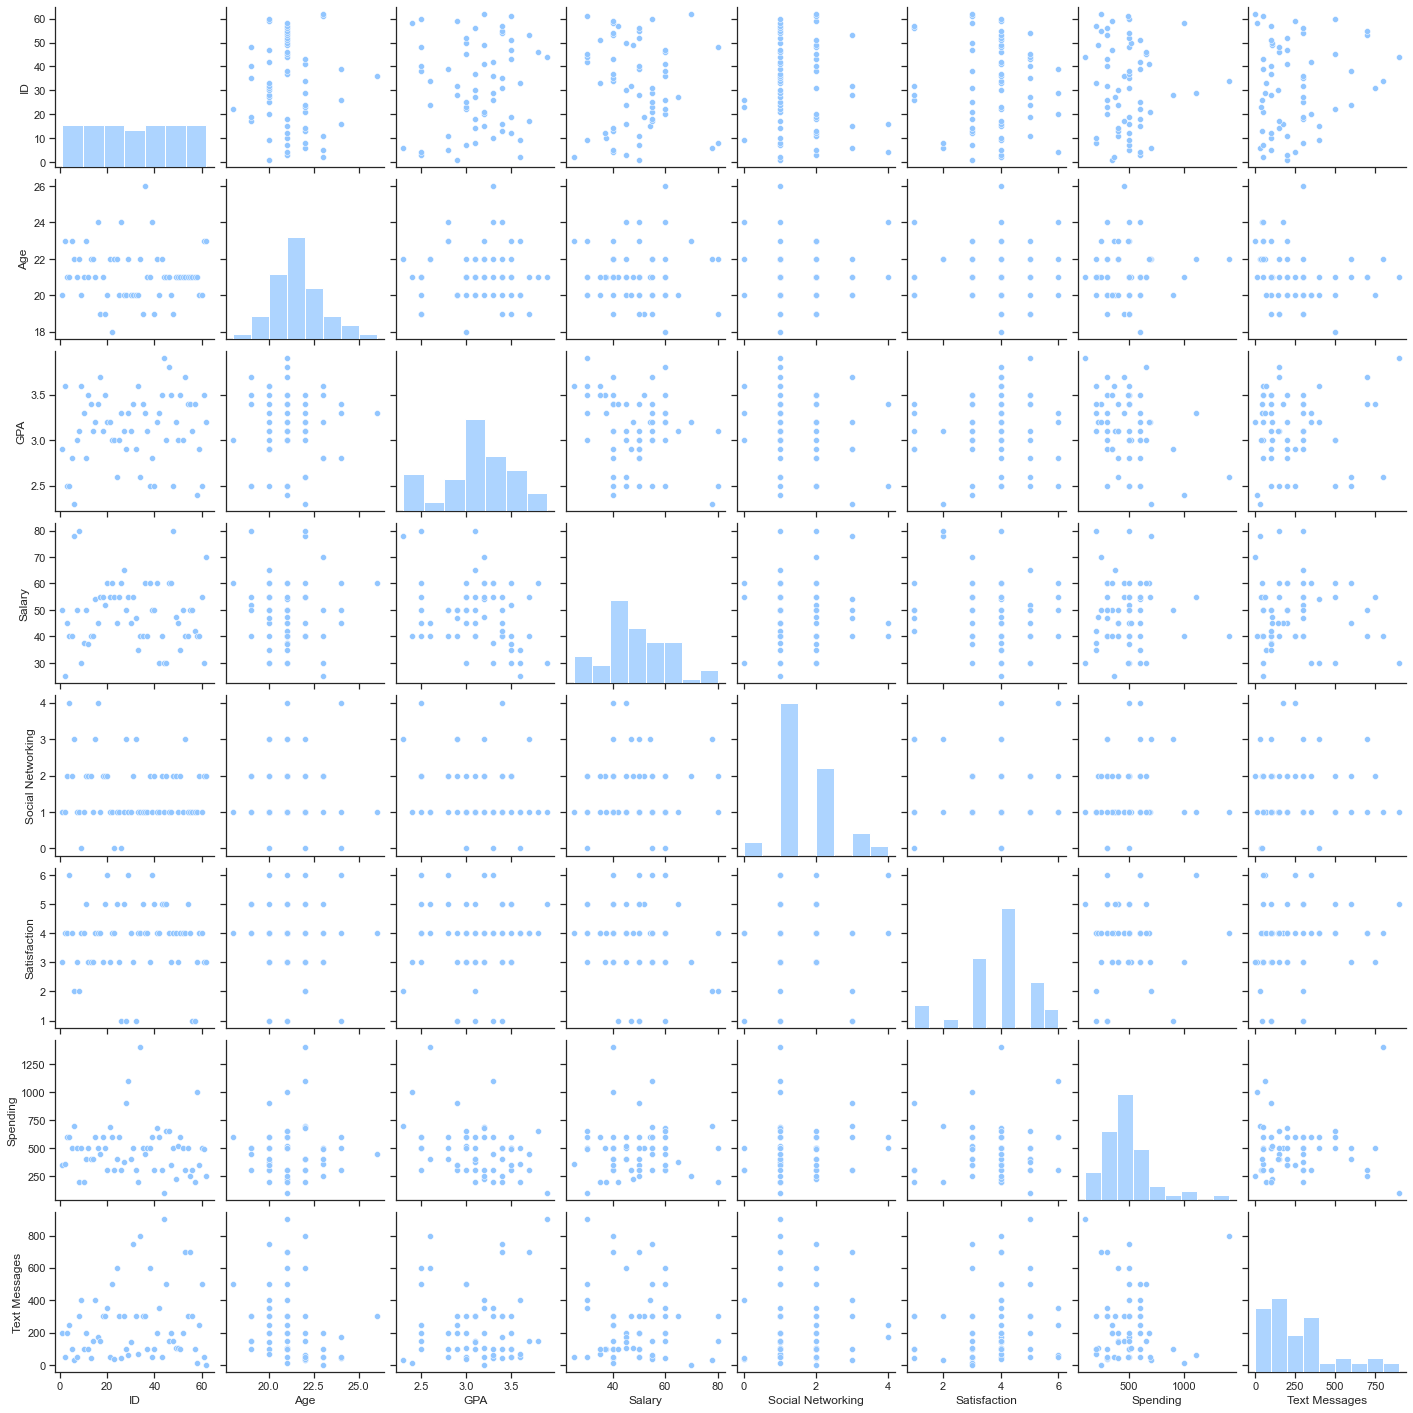

In [58]:
sns.pairplot(cmsu_df)

# 2.2

In [61]:
cmsu_df['Gender'].value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

C:\Users\randy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


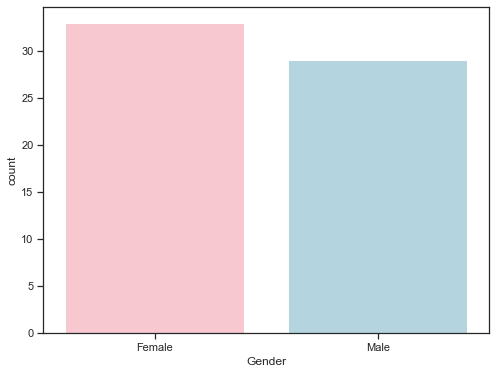

In [68]:
plt.figure(figsize=(8,6))
sns.countplot(cmsu_df.Gender,palette= ['pink','lightblue'] )
plt.show()

In [62]:
cmsu_df["Gender"].count()

62

## 2.2.1

In [79]:
print(f"Probability that a randomly selected CMSU student will be male: {round((29/62)*100,3)} %")

Probability that a randomly selected CMSU student will be male: 46.774 %


## 2.2.2

In [78]:
print(f"Probability that a randomly selected CMSU student will be female: {round((1-0.46774193548387094)*100,2)} %")

Probability that a randomly selected CMSU student will be female: 53.23 %


# 2.3
## 2.3.1

In [80]:
print(f"Conditional Probability for males in Accounting: {round((4/29)*100,2)} %")

Conditional Probability for males in Accounting: 13.79 %


In [81]:
print(f"Conditional Probability for males in CIS: {round((1/29)*100,2)} %")

Conditional Probability for males in CIS: 3.45 %


In [82]:
print(f"Conditional Probability for males in Economics/Finance: {round((4/29)*100,2)} %")

Conditional Probability for males in Economics/Finance: 13.79 %


In [83]:
print(f"Conditional Probability for males in International Business: {round((2/29)*100,2)} %")

Conditional Probability for males in International Business: 6.9 %


In [84]:
print(f"Conditional Probability for males in Management: {round((6/29)*100,2)} %")

Conditional Probability for males in Management: 20.69 %


In [85]:
print(f"Conditional Probability for males in Retailing/Marketing: {round((5/29)*100,2)} %")

Conditional Probability for males in Retailing/Marketing: 17.24 %


In [86]:
print(f"Conditional Probability for males in Others: {round((4/29)*100,2)} %")

Conditional Probability for males in Others: 13.79 %


In [88]:
print(f"Conditional Probability for males in Undecided: {round((3/29)*100,2)} %")

Conditional Probability for males in Undecided: 10.34 %


#### We can say that most of the females students prefer Retailing/Marketing as Subject Majors.

## 2.3.2

In [89]:
print(f"Conditional Probability for females in Accounting: {round((3/33)*100,2)} %")

Conditional Probability for females in Accounting: 9.09 %


In [90]:
print(f"Conditional Probability for females in CIS: {round((3/33)*100,2)} %")

Conditional Probability for females in CIS: 9.09 %


In [91]:
print(f"Conditional Probability for females in Economics/Finance: {round((7/33)*100,2)} %")

Conditional Probability for females in Economics/Finance: 21.21 %


In [92]:
print(f"Conditional Probability for females in International Business: {round((4/33)*100,2)} %")

Conditional Probability for females in International Business: 12.12 %


In [93]:
print(f"Conditional Probability for females in Management: {round((4/33)*100,2)} %")

Conditional Probability for females in Management: 12.12 %


In [94]:
print(f"Conditional Probability for females in Retailing/Marketing: {round((9/33)*100,2)} %")

Conditional Probability for females in Retailing/Marketing: 27.27 %


In [95]:
print(f"Conditional Probability for females in Others: {round((3/33)*100,2)} %")

Conditional Probability for females in Others: 9.09 %


In [96]:
print(f"Conditional Probability for females in Undecided: {round((0/33)*100,2)} %")

Conditional Probability for females in Undecided: 0.0 %


#### We can say that most of the females students prefer Retailing/Marketing as Subject Majors.

# 2.4

## 2.4.1

In [100]:
print(f"Probability of Males and intends to be Graduate is: {round((17/29)*100,2)} %")

Probability of Males and intends to be Graduate is: 58.62 %


## 2.4.2

In [139]:
print(f"Probability that a randomly selected student is a female and does NOT have a laptop is: {round((4/29)*100,2)} %")

Probability that a randomly selected student is a female and does NOT have a laptop is: 13.79 %


# 2.5

## 2.5.1

In [256]:
print(f"Probability that a randomly chosen student is a male or has full-time employment: {round((39/62)*100,2)} %")

Probability that a randomly chosen student is a male or has full-time employment: 62.9 %


## 2.5.2

In [174]:
print(f"Conditional Probability that given a female student is randomly chosen, she is majoring in International Business or Management: {round((8/33)*100,2)} %")

Conditional Probability that given a female student is randomly chosen, she is majoring in International Business or Management: 24.24 %


# 2.6

In [215]:
a = pd.crosstab(cmsu_df['Gender'], cmsu_df['Grad Intention'], margins = True )
a.drop("Undecided", axis = 1)

Grad Intention,No,Yes,All
Gender,,,
Female,9,11,33
Male,3,17,29
All,12,28,62


In [182]:
print(f"P(Grad Intention Yes) = {round((28/40)*100,2)} %")
print(f"P(Grad Intention Yes | female) = {round((11 / 20)*100,2)} %")  
print("As these probabilities are not equal, this suggests that the two events are independeent")

P(Grad Intention Yes) = 70.0 %
P(Grad Intention Yes | female) = 55.0 %
As these probabilities are not equal, this suggests that the two events are independeent


# 2.7
## 2.7.1

In [218]:
pd.crosstab(cmsu_df['Gender'], cmsu_df['GPA'])

GPA,2.3,2.4,2.5,2.6,2.8,2.9,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9
Gender,,,,,,,,,,,,,,,,
Female,1,1,2,0,1,3,5,2,4,3,2,4,1,2,1,1
Male,0,0,4,2,2,1,2,5,2,2,5,2,2,0,0,0


In [226]:
 print(f"Probability that his/her GPA is less than 3: {round((14/62)*100,2)}")

Probability that his/her GPA is less than 3: 22.58


## 2.7.2

In [227]:
pd.crosstab(cmsu_df['Gender'], cmsu_df['Salary'])

Salary,25.0,30.0,35.0,37.0,37.5,40.0,42.0,45.0,47.0,47.5,50.0,52.0,54.0,55.0,60.0,65.0,70.0,78.0,80.0
Gender,,,,,,,,,,,,,,,,,,,
Female,0,5,1,0,1,5,1,1,0,1,5,0,0,5,5,0,1,1,1
Male,1,0,1,1,0,7,0,4,1,0,4,1,1,3,3,1,0,0,1


In [258]:
print(f"Probability that randomly selected male earns 50 or more is: {round((14/29)*100,2)} %")
print(f"Probability that randomly selected female earns 50 or more is: {round((18/33)*100,2)} %")

Probability that randomly selected male earns 50 or more is: 48.28 %
Probability that randomly selected female earns 50 or more is: 54.55 %


# 2.8

C:\Users\randy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


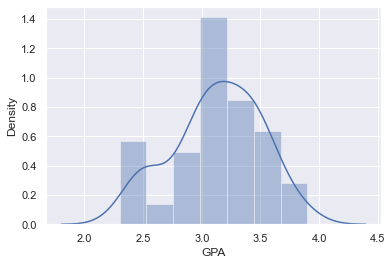

In [194]:
sns.distplot(cmsu_df['GPA']);

In [211]:
print(f"Mean of GPA = {cmsu_df['GPA'].sum()/cmsu_df['GPA'].count()}")

Mean of GPA = 3.129032258064516


C:\Users\randy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


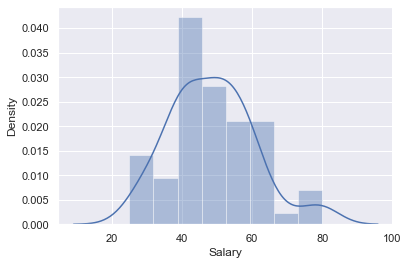

In [195]:
sns.distplot(cmsu_df['Salary']);

In [212]:
print(f"Mean of Salary = {cmsu_df['Salary'].sum()/cmsu_df['Salary'].count()}")

Mean of Salary = 48.54838709677419


C:\Users\randy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


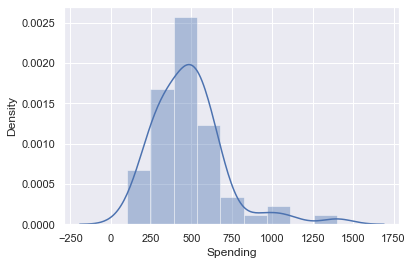

In [196]:
sns.distplot(cmsu_df['Spending']);

In [213]:
print(f"Mean of Spending = {cmsu_df['Spending'].sum()/cmsu_df['Spending'].count()}")

Mean of Salary = 482.01612903225805


C:\Users\randy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


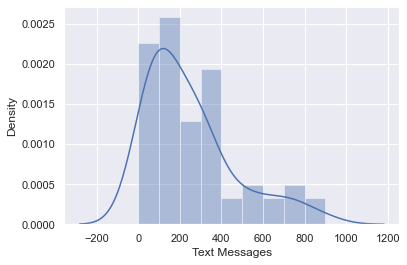

In [198]:
sns.distplot(cmsu_df['Text Messages']);

In [214]:
print(f"Mean of Text Messages = {cmsu_df['Text Messages'].sum()/cmsu_df['Text Messages'].count()}")

Mean of Text Messages = 246.20967741935485


## By these details we confirm that out of the given four data sets ‘GPA’ and ‘Salary’ are following normal distribution whereas other two ‘Spending’ and ‘Text Messages’ are not following the normal distribution

# 3.1

In [272]:
AB_df= pd.read_csv("A & B shingles-1.csv")
import scipy.stats as stats
from scipy.stats import ttest_1samp,ttest_ind

In [273]:
#A sample
alph= 0.05
t_statistic,p_value=ttest_1samp(AB_df['A'],0.35)
print("One sample t test \nt statistic: {0} p-value{1}".format(t_statistic,p_value/2))

One sample t test 
t statistic: -1.4735046253382782 p-value0.07477633144907513


In [274]:
p_value>alph

True

So, dont reject null hypothesis. It says that there is enough evidence that the mean moisture content for sample

In [275]:
# B sample
t_statistic, p_value= ttest_1samp(AB_df['B'],0.35,nan_policy="omit")
print("One sample t test \nt statistic: {0} p value: {1}".format(t_statistic, p_value/2))

One sample t test 
t statistic: -3.1003313069986995 p value: 0.0020904774003191826


In [276]:
p_value<0.05

True

So, reject null hypothesis and accept alternative hypothesis. It means that there is no enpugh evidence that the mean is less that 0.35 pounds per 100 sq.feet

# 3.2

In [277]:
t_statistic,p_value= ttest_ind(AB_df['A'], AB_df['B'],equal_var = True, nan_policy = 'omit')
print("One sample t test \nt statistic: {0} p-value:{1}".format(t_statistic,p_value))

One sample t test 
t statistic: 1.2896282719661123 p-value:0.2017496571835306


In [278]:
p_value>alph

True

P-value is greater than alpha, so don't reject null hypothesis and the population mean for shinles are taken, we do 2 sample ttest and basic assumptions before doing that test are that distribution irrespective of their sample size and variance of two distributions are same.